# Keras/TensorFlow

Keras is an API. 

remember: An API (Application Programming Interface), is ... intermediary software that facilitates communication between 2 other pieces of software. ([Course material 6.1.1.](https://krspiced.pythonanywhere.com/chapters/project_pipeline/api/README.html?highlight=api#what-is-an-api))

Keras "connects" python with TensorFlow.  

Tensorflow is the platform we use to work with neural networks. It uses dataflow graphs ([think about back and forward propagation](https://colah.github.io/posts/2015-08-Backprop/)). It is written in Cuda (a parallel computing platform working on GPUs) and C++ for performance.

Keras (https://keras.io/about/) is a deep learning API written in Python to handle several backends (TensorFlow, Microsoft Cognitiv Toolkit, Theano). Since TensorFlow 1.4 it is part of TensorFlow. It was developed with a focus on enabling fast experimentation.



### What is a tensor?
etymological origin: tension => stress/strain (in 3D structures)

![image](figures/ranks.jpg)

It's an n dimensional object, which can contain the weights of the different layers, activation functions, etc., etc., ... (any python object).

In [1]:
# what I needed to do/install after "conda create -n tensor":

# conda activate tensor
# sudo apt install python3-pip
# pip install --upgrade pip
# pip install tensorflow
# pip install opencv-python
# pip install jupyter
# pip install sklearn
# pip install matplotlib
# pip install pandas

# (my versions in 'tensor'-env: python: 3.8.10, tensorflow/keras: 2.7.0)

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

import pandas as pd
import sklearn as sk
import tensorflow as tf

print(f"Tensor Flow Version: {tf.__version__}")
print(f"Keras Version: {tf.keras.__version__}")
gpu = len(tf.config.list_physical_devices('GPU'))>0
print("GPU is", "available" if gpu else "NOT AVAILABLE")

from IPython import display

ModuleNotFoundError: No module named 'matplotlib'

In [5]:

scalar = np.array(6)

vector = np.array([7, 2, 9, 10])

matrix = np.array([[5.2, 3.0, 4.5],[9.1, 0.1, 0.3]])

tensor3 = np.array([[[1,4,7], [2,9,7], [1,3,0], [9,6,9]], [[2,3,4], [4,3,5], [7,7,2], [3, 9, 8]]])

tensor7 = np.random.rand(3,2,4,7,1,2,9)

print(f'\'scalar\' has {scalar.ndim} dimensions and a shape of {scalar.shape}.')
print(f'\'vector\' has {vector.ndim} dimension and a shape of {vector.shape}.')
print(f'\'matrix\' has {matrix.ndim} dimensions and a shape of {matrix.shape}.')
print(f'\'tensor3\' has {tensor3.ndim} dimensions and a shape of {tensor3.shape}.')
print(f'\'tensor7\' has {tensor7.ndim} dimensions and a shape of {tensor7.shape}.')

'scalar' has 0 dimensions and a shape of ().
'vector' has 1 dimension and a shape of (4,).
'matrix' has 2 dimensions and a shape of (2, 3).
'tensor3' has 3 dimensions and a shape of (2, 4, 3).
'tensor7' has 7 dimensions and a shape of (3, 2, 4, 7, 1, 2, 9).


If your notebook or the dependencies create problems, you can try using [Google colab](https://colab.research.google.com) (login required). Many students use it for their final project. Be aware of time limits (and save intermediate results).

[tensorflow playground](https://playground.tensorflow.org)

[activation functions](https://himanshuxd.medium.com/activation-functions-sigmoid-relu-leaky-relu-and-softmax-basics-for-neural-networks-and-deep-8d9c70eed91e)

## "Challenge"
Assume you have this labeled data (color codes according to the two half moons). 
![moon problem](figures/moons.png)
Task: Predict, whether an arbitrary new point belongs to the upper or to the lower half moon.  
What information do we have as input?

# Solution with Tensorflow

In [11]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500,random_state =42,noise = 0.2)

In [12]:
X

array([[ 8.30857788e-01, -3.34342282e-01],
       [ 9.91709551e-01,  8.78999659e-01],
       [ 1.10724530e+00, -4.70343756e-01],
       [-1.40899180e-01,  1.03314844e+00],
       [ 4.05592166e-01,  1.32852876e+00],
       [ 1.28895069e+00, -5.24079834e-01],
       [ 1.12079473e+00, -2.72254126e-01],
       [ 1.06593729e-01,  1.21210782e+00],
       [ 5.20198504e-01,  5.82883348e-01],
       [ 1.70590095e+00, -3.33066121e-01],
       [ 1.01561986e+00,  2.73026004e-02],
       [-5.22698706e-01,  3.81315376e-01],
       [ 1.69803483e+00, -6.18298670e-01],
       [ 2.41387822e-01,  7.07334462e-01],
       [ 1.34611143e+00, -5.07042180e-01],
       [ 1.27539204e+00, -5.22307686e-01],
       [ 1.98071107e+00,  3.48378058e-01],
       [ 9.39366864e-01,  4.68451809e-01],
       [ 6.62788578e-01, -6.14652226e-01],
       [ 1.73235560e+00, -3.06407313e-01],
       [ 1.92000739e+00,  2.77147626e-01],
       [ 2.20364555e+00,  4.45032301e-01],
       [-2.36031096e-01,  2.03082090e-01],
       [ 9.

In [13]:
y

array([1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,

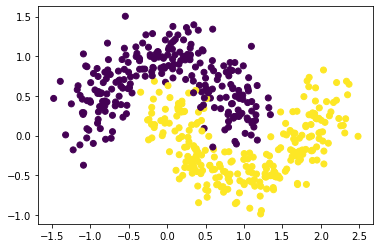

In [14]:
# scatter plot
plt.scatter(X[:,0],X[:,1],c=y) # c separates teh colors

## Recipe to Building and Artificial Neural Network 

1. **configure a model, give**:
    + architecture
    + number of neurons
    + layers
    + type of activation functions
    
2. **compile the model, give**:
    + optimizers (algorithm that finds the minimum of the loss function)  (Adam, stochastic gradiant decent ....etc)
    + loss function (the loss function to be optimized; we choose the loss function depending on the problem we are solving) (categorical cross entropy, mean square error etc etc...)
    + metrics (metrics to be tracked over training)
    
3. **fitting the model, give**:
    + epochs (number of iterations of the dataset in training)
    + batch size (the data is fed in batches; not all data at once)
    + Determines which fraction of the data is used as a validation set 
    
    
4. Evaluate  

5. Make predictions  

## 1. Simple configuration -- Tensorflow

Individual dense layers mapped one by one. Different types of layers are described [here](https://towardsdatascience.com/four-common-types-of-neural-network-layers-c0d3bb2a966c) and [here](https://keras.io/api/layers/), e.g.

In [16]:
from tensorflow.keras import backend as K

K.clear_session()
    
# run this as soon as you want to restart creating a model!

model = tf.keras.models.Sequential() 

# in case your system is not configured to support GPUs, you might get a warning

**Let's define the first layer**  
- units: number of neurons

- input_dim: dimensions (in our example: 2) of input tensor without bias (X[:,0], X[:,1])

In [19]:
X.shape

(500, 2)

In [24]:
model = tf.keras.models.Sequential() 
model.add(tf.keras.layers.Dense(units = 4,activation='sigmoid' , input_shape = (2,)))  # units is the number if neutrins in the layer
# as activation we use linear for regression provblems and for classification we use Tanh or ReLU, or sigmoid
#model.add(tf.keras.layers.Dense(units = 4,activation='sigmoid' ), input_shape(2,)) 


In [25]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 4)                 12        
Total params: 12
Trainable params: 12
Non-trainable params: 0
_________________________________________________________________


- here param gives the number of parameters we try to fit in the model. The weights and the biases.

**Second layer**  (in this case it is the outer layer)

In [26]:
model.add(tf.keras.layers.Dense(units = 1,activation='sigmoid'))  # for binary problems we do not need two neurons in the outer layer

In [27]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 4)                 12        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 5         
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________


**Where did 12 parameters in the first layer come from? Think about the architecture.**

In the first layer, 2 inputs (same for each) and 1 separate bias for each neuron. 

In the second layer, the weights for the  4 outputs of the 1st layer and 1 bias  goes to the remaining neuron.

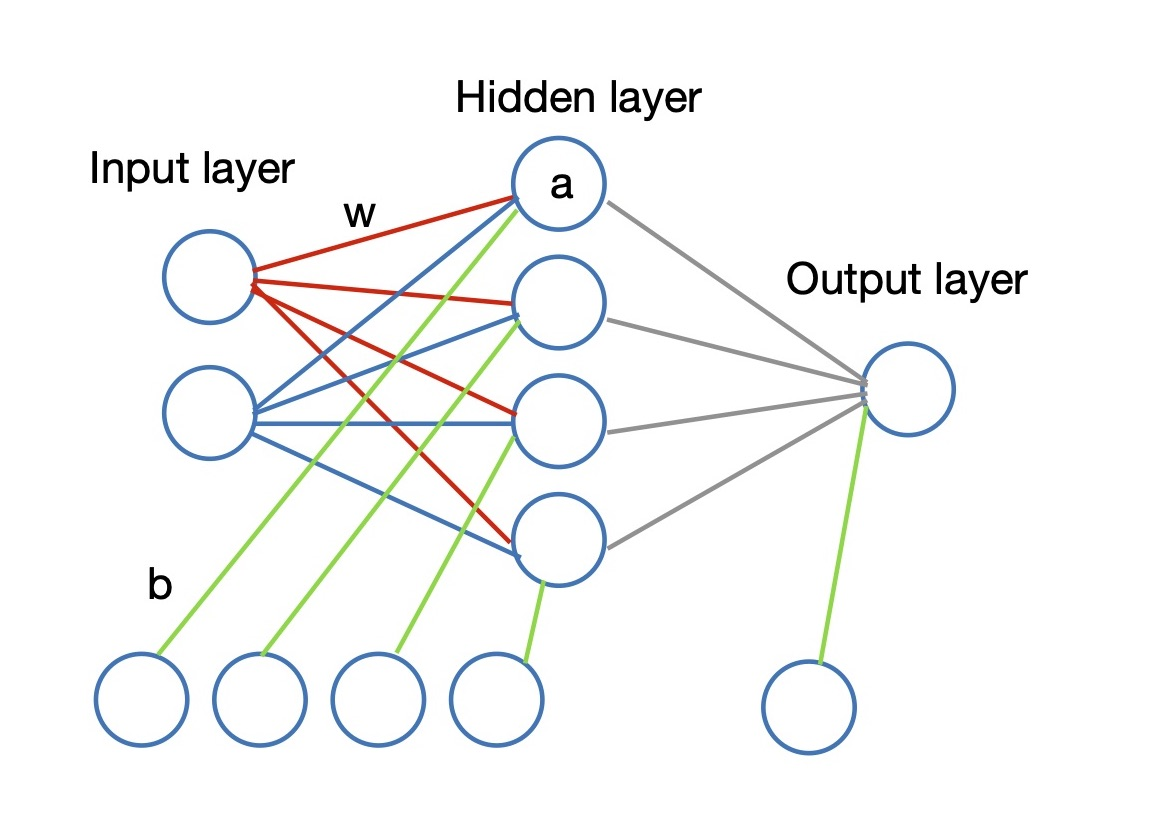

In [28]:
display.Image("figures/network.jpg")

## 2. Compilation

This is where Keras actually communicates with TensorFlow
and creates what's called a 'computation graph'. Keras is compiling
our model into a very abstract form that is implemented in C++.

One caveat about compile -- if you run this piece of code more than once in a single session, Keras will get confused.


Running Keras in Jupyter is fine, but **remember**:

    `from tensforflow.keras import backend as K
     K.clear_session()` 

You should do this everytime you use Keras, because it will clear the memory of the previously compiled model every time.

     

In [29]:
K.clear_session()
model.compile(

              optimizer = 'adam', # the algorithm used to optimize the weights. Adam is one of the best optimizers for Deep learning.
              loss ='binary_crossentropy', # how the loss is quantified (real values)
              metrics = ['accuracy'], # how good the model performs (not used by opt. algorithm)
             )

 
Some nice [explanation](https://towardsdatascience.com/a-look-at-gradient-descent-and-rmsprop-optimizers-f77d483ef08b) of optimizers like [Adam](https://keras.io/api/optimizers/adam/)
    
ADAM optimises the network using a stochastic gradient descent. It is mentioned in the documentation that it works well if the sample size is larger in comparison to the number of parameters.

**Reminder: Stochastic gradient descent tries to minimise the gradient of the loss function using randomly chosen mini-batches.**

## 3. Fit the model to training data
 

Batch size: Number of samples per gradient update.

hint: [Machine Learning Glossary](https://developers.google.com/machine-learning/glossary) (in case you don't remember the meaning of a certain ML term)

In [30]:
history = model.fit(X,y,batch_size=128, validation_split=0.3, epochs =500, 

                 # verbose = False,
                )

Epoch 1/500
3/3 [==============================] - 1s 132ms/step - loss: 0.6808 - accuracy: 0.4886 - val_loss: 0.6693 - val_accuracy: 0.5267
Epoch 2/500
3/3 [==============================] - 0s 30ms/step - loss: 0.6787 - accuracy: 0.4886 - val_loss: 0.6677 - val_accuracy: 0.5267
Epoch 3/500
3/3 [==============================] - 0s 42ms/step - loss: 0.6768 - accuracy: 0.4886 - val_loss: 0.6661 - val_accuracy: 0.5267
Epoch 4/500
3/3 [==============================] - 0s 34ms/step - loss: 0.6747 - accuracy: 0.4886 - val_loss: 0.6646 - val_accuracy: 0.5267
Epoch 5/500
3/3 [==============================] - 0s 38ms/step - loss: 0.6727 - accuracy: 0.4886 - val_loss: 0.6631 - val_accuracy: 0.5267
Epoch 6/500
3/3 [==============================] - 0s 35ms/step - loss: 0.6708 - accuracy: 0.4886 - val_loss: 0.6616 - val_accuracy: 0.5267
Epoch 7/500
3/3 [==============================] - 0s 38ms/step - loss: 0.6688 - accuracy: 0.4886 - val_loss: 0.6601 - val_accuracy: 0.5267
Epoch 8/500
3/3 [==

What do the parameters mean?
- X: input values
- y: output labels/values (classification/regression)
- epochs: like the number of increments (forward-backward propagation)
- batch_size: number of samples used (reduces computational effort instead of using all samples => stochastic gradient)
- validation_split: portion of results used for validation

## 4. Evaluation

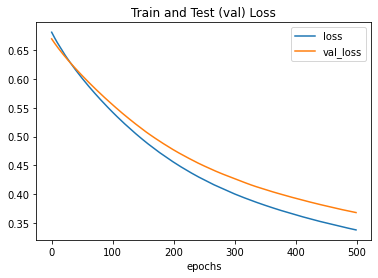

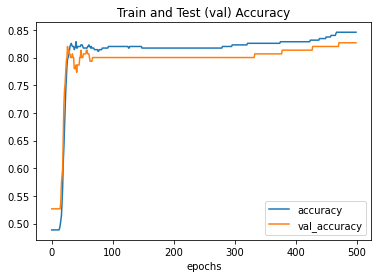

In [31]:
losses_accurs = pd.DataFrame(history.history)

losses_accurs[['loss', 'val_loss']].plot()
plt.title('Train and Test (val) Loss')
plt.xlabel('epochs')
plt.show()

losses_accurs[['accuracy', 'val_accuracy']].plot()
plt.title('Train and Test (val) Accuracy')
plt.xlabel('epochs')
plt.show()



**You can also get single elements through history.history.**

In [32]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.680775,0.488571,0.669299,0.526667
1,0.678695,0.488571,0.667699,0.526667
2,0.676770,0.488571,0.666128,0.526667
3,0.674745,0.488571,0.664588,0.526667
4,0.672723,0.488571,0.663073,0.526667
...,...,...,...,...
495,0.339293,0.845714,0.369278,0.826667
496,0.339063,0.845714,0.369046,0.826667
497,0.338839,0.845714,0.368857,0.826667
498,0.338605,0.845714,0.368623,0.826667


## 5. Predictions
(Solution to our challenge)  
Let's assume, we want to know, whether the point (0.5, -0.5) belongs to the upper or lower half moon.  
We can predict this categorical problem with our just created model.  
According to our X and y (see above), zeros belong to the upper half moon, ones to the lower.

In [34]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 4)                 12        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 5         
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________


In [35]:
model.predict([[0.5, -0.5]]) # close to 1 i.e to yellow

array([[0.8055488]], dtype=float32)

In [36]:
model.predict([[-0.5, -0.0]]) # # close to 0 i.e to blue

array([[0.27995974]], dtype=float32)


## Alternative model configuration with keras.layers


Many many more layer options than what we are doing exist. 

Checkout https://www.tensorflow.org/api_docs/python/tf/keras/layers



In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, LeakyReLU

In [38]:
K.clear_session()

model = Sequential([
                 Dense(units=4,activation ='sigmoid', input_shape = (2,)),# in i/p shape ',' is necessary at end when you have only one dimension
                 Dense(units=1,activation ='sigmoid')
])

In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 12        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 5         
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________


In [40]:
X.shape

(500, 2)

## How to save a model for later use

In [41]:
from tensorflow.keras.models import load_model

model.save("model_moons.h5")
# here you can stop your notebook
moons_model = load_model("model_moons.h5")
moons_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 12        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 5         
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________


## Summary

- We spoke about what a tensor is (n-dimensional array).  
- We tried out several network parameters (activation functions, # layers/nodes, ...) in tensorflow playground.  
- We learnt to know and used keras API to create a neural network model.  
- We performed a challenge on the two half moon problem.
- We saved and loaded the model for later use


## References
+ keras models api: https://keras.io/api/models/
+ keras layers api: https://keras.io/api/layers/
+ keras optimizer api: https://keras.io/api/optimizers/
+ keras metrics api: https://keras.io/api/metrics/
+ keras losses api: https://keras.io/api/losses/
+ To track your different experiments on models use https://www.tensorflow.org/tensorboard/get_started